Purpose is to take cellcount outputs for a given atlas and plot results from different injections

to do this need to loop over a list, import csvs as dfs, add a column, and concatenate

In [2]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import SimpleITK as sitk
import tifffile as tif
import seaborn as sns
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")
from tools.analysis.transform_points import transform_points

In [3]:
basepath = "/home/emilyjanedennis/Desktop/brains/"

# SIGMA annotations 
annotation_labels = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/labels/SIGMA_labels.csv"
SIGMA_ann_filepath = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/SIGMA_ann_in_PRA_25/result.tif"

### if you need to make a CSV file

In [ ]:

brains = ["z269_ch01","z268_ch00","z268_ch01","z267_ch00","z266_ch00","z265_ch00"]

for brain in brains:
    csv_filename = '/home/emilyjanedennis/Desktop/brains/{}/{}_counts_SIGMA_50eroded.csv'.format(brain[0:4],brain)
    data = pd.read_csv(csv_filename)
    data.insert(6,"brainname",brain)
    if brain == brains[0]:
        alldata = data
    else:
        alldata = pd.concat([alldata,data])
alldata.to_csv('/home/emilyjanedennis/Desktop/alldata.csv')

### if you already have a csv file

In [4]:
alldata = pd.read_csv('/home/emilyjanedennis/Desktop/alldata.csv')

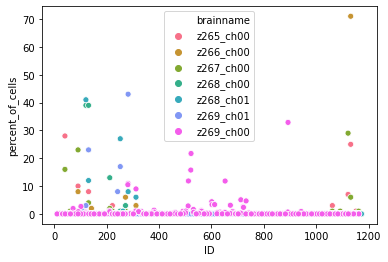

In [5]:
sns.set_palette("Blues")
ax = sns.scatterplot(x='ID',y='percent_of_cells',data=alldata,hue='brainname')
plt.show()


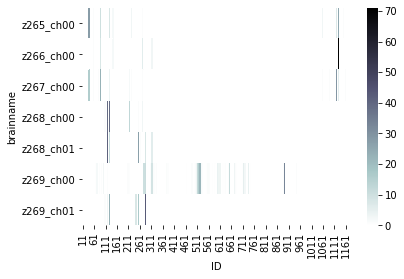

In [9]:

hm_data = alldata.pivot(index="brainname",columns='ID',values='percent_of_cells')

plt.show(sns.heatmap(hm_data,cmap="bone_r"))


In [7]:
alldata


,atlas,ID,label,histinfo,percent_of_cells,brainname,percent_of_voxels,vx_in_annotated_volume,Unnamed: 8
0,Waxholm,1121,Optic Pathways,200,7.0,z265_ch00,1.066496,18753,NaN
1,Tohoku,41,Amygdalopiriform Cortex,740,28.0,z265_ch00,0.620477,119263,NaN
2,Waxholm,1151,Ventral Hippocampal Commissure,27,1.0,z265_ch00,0.321008,8411,NaN
3,Waxholm,61,Bed Nucleus of the Stria Terminalis,44,1.0,z265_ch00,0.200209,21977,NaN
4,Waxholm,1091,Dorsal Fornix,21,0.0,z265_ch00,0.196243,10701,NaN
...,...,...,...,...,...,...,...,...,...
1629,Waxholm,832,Brachium of the Superior Colliculus,0,0.0,z269_ch00,0.000000,3339,0.0
1630,Waxholm,882,Commissure of the Superior Colliculus,0,0.0,z269_ch00,0.000000,1641,0.0
1631,Waxholm,1082,SP5,0,0.0,z269_ch00,0.000000,14276,0.0
1632,Waxholm,792,Anterior Commissure Intrabulbar part,0,0.0,z269_ch00,0.000000,25390,0.0


In [101]:
df = alldata[alldata.percent_of_cells>0]
df.to_csv('/home/emilyjanedennis/brody/ejdennis/dataforinjs.csv')

In [34]:
# want to set everything to zero except those IDs where there is signal in this brain
brain_tiff = tif.imread(SIGMA_ann_filepath)
np.max(brain_tiff)

for i in df['ID']:
    if df[df['ID']==i]['percent_of_voxels'].item() > 0:
        brain_tiff[brain_tiff==i]= 100*df[df['ID']==i]['percent_of_voxels'].item()
    else:
        brain_tiff[brain_tiff==i]=0

<ipython-input-34-594601844804>:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  if df[df['ID']==i]['percent_of_voxels'].item() > 0:
<ipython-input-34-594601844804>:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  brain_tiff[brain_tiff==i]= 100*df[df['ID']==i]['percent_of_voxels'].item()


In [35]:
tif.imsave('/home/emilyjanedennis/Desktop/z265_SIGMA.tif',brain_tiff)

In [36]:
x = tif.imread('/home/emilyjanedennis/Desktop/brains/z269/z269eroded_results.tif')

In [73]:
for i in np.unique(x):
    if i > 0:
        mask = dfcopy['ID']==i
        dfcopy.loc[mask,'percent_of_cells'] = np.size([x[x==i]])

In [79]:
# want to set everything to zero except those IDs where there is signal in this brain
df=dfcopy;

brain_tiff = tif.imread(SIGMA_ann_filepath)
np.max(brain_tiff)

for i in df['ID']:
    if df[df['ID']==i]['percent_of_cells'].item() > 0:
        brain_tiff[brain_tiff==i]= 100*(df[df['ID']==i]['percent_of_cells'].item())/(df[df['ID']==i]['vx_in_annotated_volume'].item())
    else:
        brain_tiff[brain_tiff==i]=0

<ipython-input-79-bb952214010d>:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  if df[df['ID']==i]['percent_of_cells'].item() > 0:
<ipython-input-79-bb952214010d>:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  brain_tiff[brain_tiff==i]= 100*(df[df['ID']==i]['percent_of_cells'].item())/(df[df['ID']==i]['vx_in_annotated_volume'].item())


In [80]:
tif.imsave('/home/emilyjanedennis/Desktop/z269_SIGMA.tif',brain_tiff)

In [81]:
df.to_csv('z269_0.csv')

,Unnamed: 0,Unnamed: 0.1,atlas,ID,label,histinfo,percent_of_cells,brainname,percent_of_voxels,vx_in_annotated_volume
1191,21,21,Tohoku,11,Agranular Dysgranular Insular Cortex,0,1000,z265_ch00,0.0,30415
